#1 Introducción
En este cuaderno se desarrollará el estudio de un modelo matemático que describe y estudia objetos y fenómenos frecuentes en la naturaleza que no se pueden explicar por las teorías clásicas y que se obtienen mediante simulaciones del proceso que los crea.

Un fractal es un objeto geométrico cuya estructura básica, fragmentada o aparentemente irregular, se repite a diferentes escalas.​ El término fue propuesto por el matemático Benoît Mandelbrot en 1975 y deriva del latín fractus, que significa quebrado o fracturado. Muchas estructuras naturales son de tipo fractal

---
#2 Armado de ambiente
Para el correcto funcionamiento es necesario instalar la libreria **pyopencl** y a su vez subir el codigo fuente " *fractal.c* "

In [ ]:

! pip install pyopencl

     |████████████████████████████████| 747kB 10.8MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
  Created wheel for pytools: filename=pytools-2020.4.3-py2.py3-none-any.whl size=61374 sha256=4d2e364a2210326a3b475ec7a8495352b1b4f8e1ebcc4fb34e712f01066a499f
  Stored in directory: /root/.cache/pip/wheels/af/c7/81/a22edb90b0b09a880468b2253bb1df8e9f503337ee15432c64
Successfully built pytools


In [ ]:
#@title # 2.2 Parámetros de ejecución subir archivo
#@markdown ---
#@markdown ### Especifique la URL del archivo:
url_archivo = "https://github.com/lucasarzola/EA2-SOA-GALAXIA/blob/master/HPC/Ejercicio3/fractal.c?raw=true" #@param {type:"string"}

#@markdown ---
# Leo la imagen desde internet.
#!wget https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true -O imagen.jpg

# TODO: Mejorar informaciòn y resutlado de ejecución. 
!wget {url_archivo} -O fractal.c

--2020-11-22 19:25:32--  https://github.com/lucasarzola/EA2-SOA-GALAXIA/blob/master/HPC/Ejercicio3/fractal.c?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/lucasarzola/EA2-SOA-GALAXIA/raw/master/HPC/Ejercicio3/fractal.c [following]
--2020-11-22 19:25:32--  https://github.com/lucasarzola/EA2-SOA-GALAXIA/raw/master/HPC/Ejercicio3/fractal.c
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucasarzola/EA2-SOA-GALAXIA/master/HPC/Ejercicio3/fractal.c [following]
--2020-11-22 19:25:32--  https://raw.githubusercontent.com/lucasarzola/EA2-SOA-GALAXIA/master/HPC/Ejercicio3/fractal.c
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.git

---
#3 Desarrollo

1.0 121.0


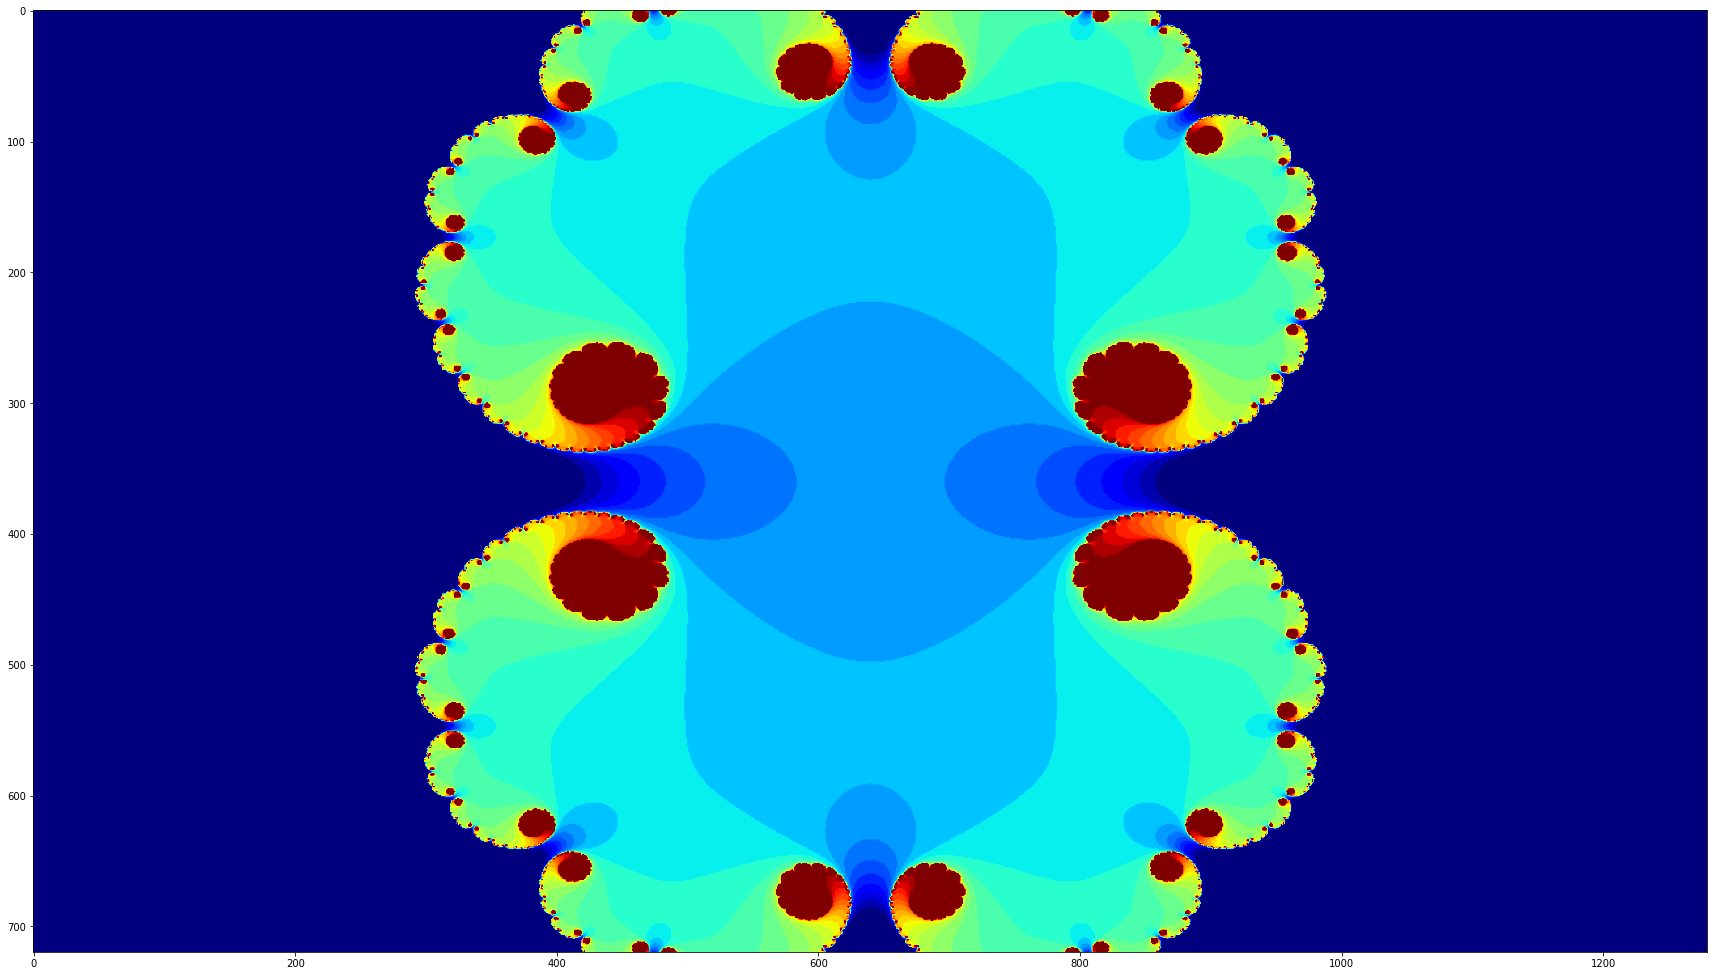

Tiempo Total:  1530.1509999999998 [ms]
Tiempo GPU:  1.224 [ms]


In [ ]:
#@title 3.1 Parámetros de ejecución { vertical-output: true }

v_min =   10#@param {type: "number"}
v_max =   35#@param {type: "number"}
from datetime import datetime
tiempo_total = datetime.now()
from __future__ import absolute_import, print_function
import matplotlib.pyplot as plt
import pyopencl as cl
import numpy as np

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

# --------------------------------------------
#Inicializar contexto y cola de ejecución
ID_P = 0
ID_D = 0
platforms = cl.get_platforms()
devices = [platforms[ID_P].get_devices()[ID_D]]
context = cl.Context(devices=devices,properties=[(cl.context_properties.PLATFORM, platforms[ID_P])])
context.get_info(cl.context_info.DEVICES)
queue = cl.CommandQueue(context, properties=cl.command_queue_properties.OUT_OF_ORDER_EXEC_MODE_ENABLE)
queue.get_info(cl.command_queue_info.CONTEXT)

# --------------------------------------------
#Código fuente y compilación del programa
try:
  source_file=open("fractal.c","r")
  kernel = source_file.read()
  source_file.close()

  prg = cl.Program(context, kernel)
  exe = prg.build(options=[])

  host_output = np.zeros((720,1280),dtype=np.float32)
  device_output = cl.Buffer(context, cl.mem_flags.READ_WRITE, size=host_output.nbytes)   

  C = [0.279, 0]
  event=exe.fractal(queue, host_output.shape, None, np.array(C,dtype=np.float32),np.array([40,70],dtype=np.float32),device_output)
  tiempo_gpu = datetime.now()

  cl.enqueue_copy(queue, host_output, device_output, is_blocking=True, wait_for=[event])
  tiempo_gpu = datetime.now() - tiempo_gpu
  print(host_output.min(),host_output.max())
  plt.figure(figsize=(30,30))
  plt.imshow(host_output,'jet',vmin=v_min,vmax=v_max)
  plt.show()

  tiempo_total = datetime.now() - tiempo_total
  print("Tiempo Total: ", tiempo_en_ms( tiempo_total ), "[ms]" )
  print("Tiempo GPU: ", tiempo_en_ms( tiempo_gpu ), "[ms]" )


except IOError:
    print ("Error de entrada/salida." )



---
#4 Tabla 
 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura del tamaño de las matrices en Colab.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  queue.get_info(cl.cqi.CONTEXT) | Inicializar contexto y cola de ejecución.
**GPU**  |  cl.Program(context, kernel)     | Código fuente y compilación del programa
CPU      |  print()               | Informo los resultados.


---
#5 Conclusiones
Luego de una larga e intensiva investigación, se decidió por el análisis y estudio de los patrones Fractales, que son muy interesantes, ya que son irregulares y encontrados en la naturaleza, para su realización se utilizó el API de calculo paralelo OpenCL . importando la librería *pyopencl*. Por otra parte el código principal del algoritmo de Fractal es realizado en C, lo que conllevó a la investigacion de como abrir archivos C dentro de python , por otra parte, la estructura básica de Open CL. es muy parecida a las vistas en clases, donde utilizamos las utilidades de la biblioteca. Para hacer parametrizar el ejercicio se modifica los valores maximos y minimos para definir los colores que va a dibujar la imagen.

#6 Bibliografía

[1] Fractal- wikipedia [Referencia](https://es.wikipedia.org/wiki/Fractal)

[2] pyopencl- documentacion [Referencia](https://documen.tician.de/pyopencl)

[3] opencl - official website [Referencia](https://www.khronos.org/opencl/)

[4] algoritmo Fractal en C [Referencia](https://www.geeksforgeeks.org/fractals-in-cc/)
